In [4]:
#!pip install pycopy-urllib.parse
#!pip install publicsuffix2

In [18]:

## Importação das bibliotecas

import pandas as pd

from urllib.parse import urlparse

from publicsuffix2 import get_public_suffix
from publicsuffix2 import PublicSuffixList

import matplotlib as plt

In [6]:
df = pd.read_csv('job_bioinfo_csv/bioinf_vagas_deduplicado.csv', delimiter=',')
df.head() 

,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count
0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130
1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231
2,2,2,http://diffbot.com/entity/JOB1570298833,en,JOB1570298833,1486437231,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",http://www.nature.com/naturejobs/science/jobs/...,NaN,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",Job,179
3,3,3,http://diffbot.com/entity/JOB2313411533,en,JOB2313411533,1629620706,Postdoctoral Fellow in Bioinformatics and/or G...,https://www.nature.com/naturecareers/job/postd...,"Must hold a Ph.D. degree, with publications in...",NaN,We are looking for enthusiastic postdoctoral f...,NaN,We are looking for enthusiastic postdoctoral f...,Postdoctoral Fellow in Bioinformatics and/or G...,Job,351
4,4,4,http://diffbot.com/entity/JOB2513853425,en,JOB2513853425,1563630178,"Postdoctoral Position in Bioinformatics, Micro...",https://www.nature.com/naturecareers/job/postd...,NaN,NaN,Work group:\nInstitute of Virology\nArea of re...,NaN,Work group:\nInstitute of Virology\nArea of re...,"Postdoctoral Position in Bioinformatics, Micro...",Job,525


In [7]:
urls = df.pageUrl.values

In [8]:
def clean_url(urls):
    psl = PublicSuffixList()
    ##Removo prefixo
    urls_cleaned = []
    for url in urls:
        domain = urlparse(url).netloc
        domain = domain.replace('www.', '')
        urls_cleaned.append(domain)
    ## Removo sufixo e prefixo de caminho
    urls_cleaned_2 = []
    for url in urls_cleaned:
        urls_cleaned_2.append(psl.get_public_suffix(url).replace(psl.get_tld(url), '')[:-1])

    return urls_cleaned_2

In [9]:
df['urlCleaned'] = clean_url(urls)

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,word_count,urlCleaned
0,0,0,http://diffbot.com/entity/JOB966384586,en,JOB966384586,1591962958,"Bioinformatics Specialist, GIS",https://www.nature.com/naturecareers/job/bioin...,NaN,NaN,The Genomics Institute of Singapore () has an ...,NaN,The Genomics Institute of Singapore () has an ...,"Bioinformatics Specialist, GIS",Job,130,nature
1,1,1,http://diffbot.com/entity/JOB1028283361,en,JOB1028283361,1549734701,Postdoctoral Fellowship in Bioinformatics and ...,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,"The laboratories of Drs. Jeffrey Pessin, Fajun...",NaN,"The laboratories of Drs. Jeffrey Pessin, Fajun...",Postdoctoral Fellowship in Bioinformatics and ...,Job,231,nature
2,2,2,http://diffbot.com/entity/JOB1570298833,en,JOB1570298833,1486437231,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",http://www.nature.com/naturejobs/science/jobs/...,NaN,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,NaN,\nTweet\nFacebook\nLinkedIn\nThe MDI Biologica...,"Bioinformatics Analyst : Bar Harbor, ME, Unite...",Job,179,nature
3,3,3,http://diffbot.com/entity/JOB2313411533,en,JOB2313411533,1629620706,Postdoctoral Fellow in Bioinformatics and/or G...,https://www.nature.com/naturecareers/job/postd...,"Must hold a Ph.D. degree, with publications in...",NaN,We are looking for enthusiastic postdoctoral f...,NaN,We are looking for enthusiastic postdoctoral f...,Postdoctoral Fellow in Bioinformatics and/or G...,Job,351,nature
4,4,4,http://diffbot.com/entity/JOB2513853425,en,JOB2513853425,1563630178,"Postdoctoral Position in Bioinformatics, Micro...",https://www.nature.com/naturecareers/job/postd...,NaN,NaN,Work group:\nInstitute of Virology\nArea of re...,NaN,Work group:\nInstitute of Virology\nArea of re...,"Postdoctoral Position in Bioinformatics, Micro...",Job,525,nature


<AxesSubplot:>

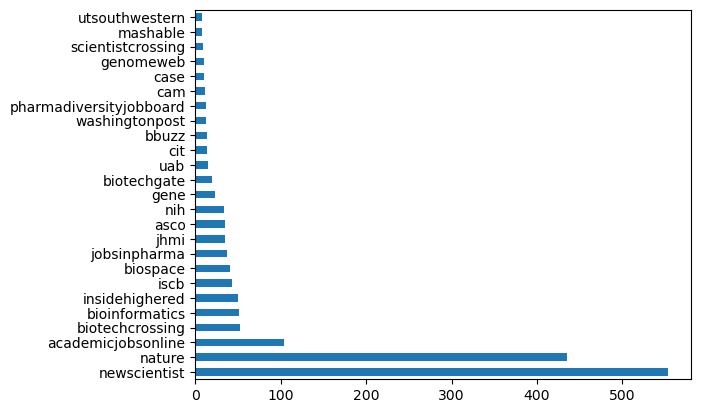

In [11]:
df['urlCleaned'].value_counts()[:25].plot(kind='barh')

In [34]:
df['urlCleaned'].value_counts().head(15)

newscientist          553
nature                435
academicjobsonline    104
biotechcrossing        52
bioinformatics         51
insidehighered         50
iscb                   43
biospace               40
jobsinpharma           37
jhmi                   35
asco                   35
nih                    33
gene                   23
biotechgate            20
uab                    15
Name: urlCleaned, dtype: int64

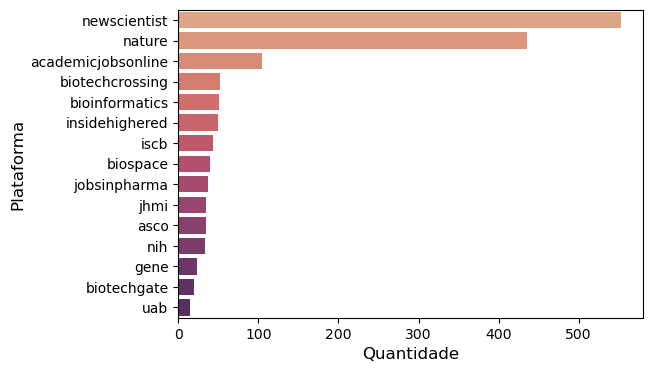

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#contagem valores unicos em 'urlCleaned'
df_counts = df['urlCleaned'].value_counts().to_frame().reset_index()
df_counts.columns = ['urlCleaned', 'count']

df_top15 = df_counts.head(15)

#paletas de cores: "viridis", "crest", "rocket_r"
custom_palette = sns.color_palette("flare", n_colors=15)
plt.figure(figsize=(6,4))
sns.barplot(data=df_top15, x='count', y='urlCleaned', palette=custom_palette)

# Configurar o título e os rótulos dos eixos
#plt.title('Principais plataformas')
plt.xlabel('Quantidade', fontsize = 12)
plt.ylabel('Plataforma', fontsize = 12)

# Exibir o gráfico
plt.show()


New Scientist: É uma revista semanal que abrange notícias e artigos sobre ciência e tecnologia. É conhecida por seu conteúdo de ponta em áreas como física, biologia, meio ambiente e tecnologia.

Nature: É uma das principais revistas científicas do mundo, publicando pesquisas originais em todas as áreas da ciência, bem como artigos de opinião, notícias e análises.

AcademicJobsOnline: É um site que lista oportunidades de emprego em instituições acadêmicas em todo o mundo, desde cargos de professor assistente até cargos administrativos.

BiotechCrossing: É um site de empregos que se concentra em empregos na indústria de biotecnologia, incluindo oportunidades em pesquisa, desenvolvimento, marketing e vendas.

Bioinformática: É uma área interdisciplinar que combina biologia e ciência da computação para analisar e interpretar dados biológicos, incluindo dados genômicos, proteômicos e metabolômicos.

InsideHigherEd: É um site de notícias e opinião que cobre questões relacionadas ao ensino superior, incluindo finanças, política, pesquisa e desenvolvimento profissional.

ISCB: International Society for Computational Biology (Sociedade Internacional de Biologia Computacional) é uma organização profissional dedicada à promoção do avanço da biologia computacional em todo o mundo.

BioSpace: É um site que fornece notícias, informações de carreira e recursos para profissionais da indústria de biotecnologia, incluindo empregos, eventos e publicações.

JobsInPharma: É um site de empregos que se concentra em oportunidades de emprego na indústria farmacêutica, incluindo pesquisa e desenvolvimento, fabricação, marketing e vendas.

JHMI: É a sigla para Johns Hopkins Medical Institutions, um complexo de instituições médicas e de pesquisa em Baltimore, Maryland, EUA, que inclui a Universidade Johns Hopkins School of Medicine e o Hospital Johns Hopkins.

ASCO: American Society of Clinical Oncology (Sociedade Americana de Oncologia Clínica) é uma organização profissional que representa oncologistas clínicos em todo o mundo, com o objetivo de melhorar a qualidade do atendimento ao paciente e avançar na pesquisa do câncer.

NIH: National Institutes of Health (Institutos Nacionais de Saúde) é uma agência do governo dos EUA que financia pesquisas biomédicas e de saúde pública em todo o mundo.

Gene: Genes são unidades básicas de hereditariedade encontradas em todas as células vivas. Eles contêm as instruções para a produção de proteínas e outras moléculas que desempenham um papel importante na função celular.

BiotechGate: É um site que fornece informações sobre empresas de biotecnologia em todo o mundo, incluindo dados financeiros, notícias e oportunidades de investimento.

UAB: University of Alabama at Birmingham (Universidade do Alabama em Birmingham) é uma universidade pública de pesquisa em Birmingham, Alabama, EUA, que é líder em pesquisas médicas e biomédicas.

Publicações Científicas: New Scientist, Nature

Recursos de Carreira: AcademicJobsOnline, BiotechCrossing, JobsInPharma, BioSpace, InsideHigherEd

Organizações Profissionais: ISCB, ASCO

Instituições de Pesquisa Médica: NIH, JHMI, UAB

Conceitos científicos: Gene, Bioinformática

Recursos para Empresas de Biotecnologia: BiotechGate

### Total de plataformas.

In [15]:
df['urlCleaned'].value_counts()

newscientist           553
nature                 435
academicjobsonline     104
biotechcrossing         52
bioinformatics          51
                      ... 
careeredu                1
eagle-i                  1
indiabioscience          1
universiteitutrecht      1
upc                      1
Name: urlCleaned, Length: 228, dtype: int64

In [14]:
len(df['urlCleaned'].value_counts())

228

In [9]:
df.to_csv('job_bioinfo_csv/df_deduplicado_url.csv')

In [10]:
len(df)

2016